In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, how="left", on=["city"])

# Display the data table for preview
city_ride_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
total_fare = city_ride_data.fare.sum()

In [3]:
total_rides = city_ride_data.ride_id.count()

In [4]:
aggregations = {
    'fare': {
        'Total Fare': 'sum'
    }, 
    'ride_id': {
        'Total Rides': 'count'
    }
}

In [5]:
# Using GroupBy in order to separate the data into fields according to "Type" values
city_ride_df = city_ride_data.groupby(['type']).agg(aggregations)


# In order to be visualized, a data function must be used...
city_ride_df.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,fare,ride_id
,Total Fare,Total Rides
type,,
Rural,4327.93,125
Suburban,19356.33,625
Urban,39854.38,1625


In [6]:
city_ride_df['Total Fare Percentage'] =  (city_ride_df['fare','Total Fare'] / total_fare ) * 100

In [7]:
city_ride_df['Total Ride Percentage'] =  (city_ride_df['ride_id','Total Rides'] / total_rides ) * 100

In [8]:
city_ride_df = city_ride_df.reset_index()

In [9]:
city_ride_df.head()

,type,fare,ride_id,Total Fare Percentage,Total Ride Percentage
,,Total Fare,Total Rides,,
0,Rural,4327.93,125,6.811493,5.263158
1,Suburban,19356.33,625,30.463872,26.315789
2,Urban,39854.38,1625,62.724635,68.421053


In [10]:
# Using GroupBy in order to separate the data into fields according to "Type" values
city_data_grp = city_data.groupby(['type']).sum()

In [11]:
city_data_grp['Total Driver Percentage'] =  (city_data_grp['driver_count'] / city_data_grp.driver_count.sum() ) * 100

In [12]:
city_data_grp = city_data_grp.reset_index()

In [13]:
city_data_grp.head()

,type,driver_count,Total Driver Percentage
0,Rural,78,2.623613
1,Suburban,490,16.481668
2,Urban,2405,80.894719


## Bubble Plot of Ride Sharing Data

In [14]:
city_ride_bubble = city_ride_data.groupby(['city']).agg({'fare':'mean', 'ride_id':'count', 'type': 'max', 'driver_count': 'max'})
city_ride_bubble = city_ride_bubble.rename({'fare': 'average_fare', 'ride_id': 'total_rides'}, axis=1) 
city_ride_bubble = city_ride_bubble.reset_index()
city_ride_bubble.head()

,city,average_fare,total_rides,type,driver_count
0,Amandaburgh,24.641667,18,Urban,12
1,Barajasview,25.332273,22,Urban,26
2,Barronchester,36.422500,16,Suburban,11
3,Bethanyland,32.956111,18,Suburban,22
4,Bradshawfurt,40.064000,10,Rural,7


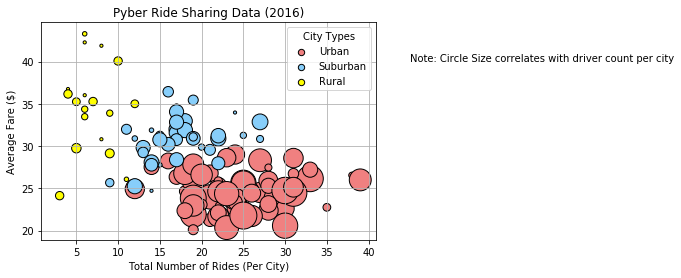

<Figure size 432x288 with 0 Axes>

In [15]:
# Obtain the x and y coordinates for each of the three city types
city_type = city_ride_bubble["type"].unique()
colour=['lightcoral','lightskyblue','yellow']
j=0

# Build the scatter plots for each city types
for i in city_type:
    x_axis = city_ride_bubble.loc[city_ride_bubble["type"] == i]["total_rides"]
    data = city_ride_bubble.loc[city_ride_bubble["type"] == i]["average_fare"]
    circle_size = city_ride_bubble.loc[city_ride_bubble["type"] == i]["driver_count"]
    plt.scatter(x_axis, data, marker="o", facecolor=colour[j], edgecolors="black", s=circle_size*10, alpha=1, label=i)
    j=j+1

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
lgnd = plt.legend(title='City Types',loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
plt.grid(True)

# Incorporate a text label regarding circle size
plt.text(45,40,'Note: Circle Size correlates with driver count per city')

# Show Figure
plt.show()

# Save Figure
plt.savefig('Ride_bubble_chart.png')

## Total Fares by City Type

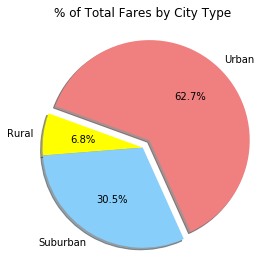

In [16]:
# Build Pie Chart
labels = city_ride_df["type"]
sizes = city_ride_df["Total Fare Percentage"]
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Fares by City Type')

# Resize plot to display labels
plt.tight_layout()

# Show Figure
plt.show()

In [17]:
# Save Figure
plt.savefig('Total_Fare_pie.png')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

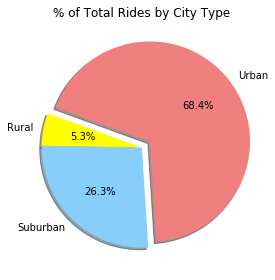

In [18]:
# Build Pie Chart
labels = city_ride_df["type"]
sizes = city_ride_df["Total Ride Percentage"]
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Rides by City Type')

# Resize plot to display labels
plt.tight_layout()

# Show Figure
plt.show()

In [19]:
# Save Figure
plt.savefig('Total_Ride_pie.png')

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

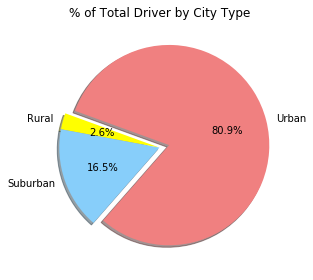

In [20]:
# Build Pie Chart
labels = city_data_grp["type"]
sizes = city_data_grp["Total Driver Percentage"]
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title('% of Total Driver by City Type')

# Resize plot to display labels
plt.tight_layout()

# Show Figure
plt.show()

In [21]:
# Save Figure
plt.savefig('Total_Driver_pie.png')

<Figure size 432x288 with 0 Axes>